# Exploratory Data Analysis with Python

## Introducción a EDA

El conjunto de datos que vamos a utilizar a lo largo de la sesión se puede encontrar en - https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

#### Importar las librerias requeridas

In [996]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import warnings

#warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
%matplotlib inline
#plt.rcParams['figure.figsize'] = [12, 8]

#### Primera mirada al dataset!

Aquí, vamos a utilizar pandas para leer el archivo csv descargado. A continuación, realice una primera mirada al dataset, identificando el número de filas y columnas en el conjunto de datos.



In [997]:
# Importar el dataset
df_healthcare = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [998]:
df_healthcare.shape

(5110, 12)

In [999]:
# Identificar cantidad de filas y columnas
print("The dataset has {} rows and {} columns.".format(df_healthcare.shape[0], df_healthcare.shape[1]))

The dataset has 5110 rows and 12 columns.


In [1000]:
# Revisar los primeros registros
df_healthcare.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [1001]:
# Ultimas filas
df_healthcare.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [1002]:
# Ver el dataset completo
df_healthcare

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [1003]:
# Trasponerlo
df_healthcare.T

,0,1,2,3,4,5,6,7,8,9,...,5100,5101,5102,5103,5104,5105,5106,5107,5108,5109
id,9046,51676,31112,60182,1665,56669,53882,10434,27419,60491,...,68398,36901,45010,22127,14180,18234,44873,19723,37544,44679
gender,Male,Female,Male,Female,Female,Male,Male,Female,Female,Female,...,Male,Female,Female,Female,Female,Female,Female,Female,Male,Female
age,67.0,61.0,80.0,49.0,79.0,81.0,74.0,69.0,59.0,78.0,...,82.0,45.0,57.0,18.0,13.0,80.0,81.0,35.0,51.0,44.0
hypertension,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
heart_disease,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ever_married,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,...,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes
work_type,Private,Self-employed,Private,Private,Self-employed,Private,Private,Private,Private,Private,...,Self-employed,Private,Private,Private,children,Private,Self-employed,Self-employed,Private,Govt_job
Residence_type,Urban,Rural,Rural,Urban,Rural,Urban,Rural,Urban,Rural,Urban,...,Rural,Urban,Rural,Urban,Rural,Urban,Urban,Rural,Rural,Urban
avg_glucose_level,228.69,202.21,105.92,171.23,174.12,186.21,70.09,94.39,76.15,58.57,...,71.97,97.95,77.93,82.85,103.08,83.75,125.2,82.99,166.29,85.28
bmi,36.6,NaN,32.5,34.4,24.0,29.0,27.4,22.8,NaN,24.2,...,28.3,24.5,21.7,46.9,18.6,NaN,40.0,30.6,25.6,26.2


#### Información de los Atributos

> 1) **id:** unique identifier

> 2) **gender:** "Male", "Female" or "Other"

> 3) **age:** age of the patient

> 4) **hypertension:** 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

> 5) **heart_disease:** 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

> 6) **ever_married:** "No" or "Yes"

> 7) **work_type:** "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

> 8) **Residence_type:** "Rural" or "Urban"

> 9) **avg_glucose_level:** average glucose level in blood

> 10) **bmi:** body mass index

> 11) **smoking_status:** "formerly smoked", "never smoked", "smokes" or "Unknown"*

> 12) **stroke:** 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

#### Analizando el dataset

#### Identificar el número de columnas, si hay valores perdidos y también el tipo de características / variables que se encuentran en el conjunto de datos.

In [1004]:
df_healthcare.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [1005]:
print("Hay " + str(df_healthcare.shape[1]) + " columnas")

Hay 12 columnas


In [1006]:
df_healthcare.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [1007]:
df_healthcare.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

#### Filtre el dataset considerando por un lado a los datos tipo objeto y por el otro los numericos

In [1008]:
df_healthcare_numericos = df_healthcare.select_dtypes(include=['number'])
df_healthcare_objetos = df_healthcare.select_dtypes(include=['object'])

#### ¿Qué persona tiene el IMC máximo del conjunto de datos?

In [1009]:
df_healthcare

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [1010]:
df_healthcare[df_healthcare["bmi"] == df_healthcare["bmi"].max()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2128,56420,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0


#### Preguntas sobre la mirada inicial

 1. ¿Está correlacionado la variable gender con stroke? ¿Tienen más probabilidades de sufrirlo los hombres o las mujeres?

In [1011]:
gender_stroke = df_healthcare.groupby(["gender", "stroke"]).size().reset_index(name='count')
gender_stroke ["porcentaje"] = gender_stroke.groupby('gender')['count'].transform(lambda x: 100 * x / x.sum())
gender_stroke

,gender,stroke,count,porcentaje
0,Female,0,2853,95.290581
1,Female,1,141,4.709419
2,Male,0,2007,94.893617
3,Male,1,108,5.106383
4,Other,0,1,100.000000


##### No hay correlación entre la variable gender y stroke. Los hombres tienen más probabilidades de sufrirlo que las mujeres.

## Ejercicio

1. ¿Cuál es el valor de la décima observación de la característica edad desde la parte superior del conjunto de datos?

In [1012]:
df_healthcare["age"].iloc[9]

78.0

2. ¿Cuál es el valor de la 7ª observación de la característica bmi desde el fondo del conjunto de datos?

In [1013]:
df_healthcare["bmi"].iloc[-7]

46.9

3. ¿Cuál es el id number y el work_type de la persona con el nivel medio de glucosa más bajo del conjunto de datos?

In [1014]:
df_healthcare[df_healthcare["avg_glucose_level"] == df_healthcare["avg_glucose_level"].min()][["id", "work_type"]]

,id,work_type
4886,60562,Private


4. Imprime un dataframe filtrado, basado en tres condiciones:

   a) Edad inferior a 30 años
   b) Tipo_residencia es Rural
   c) El sexo es femenino
   
   ¿Cuántas filas hay en el conjunto de datos filtrado?

In [1015]:
df_filtrado = df_healthcare[(df_healthcare["age"] < 30) & (df_healthcare["Residence_type"] == "Rural") & (df_healthcare["gender"] == "Female")]
df_filtrado


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
245,49669,Female,14.00,0,0,No,children,Rural,57.93,30.9,Unknown,1
292,44338,Female,16.00,0,0,No,children,Rural,110.63,19.5,Unknown,0
294,34974,Female,22.00,0,0,No,Private,Rural,79.81,27.7,Unknown,0
312,68249,Female,27.00,0,0,Yes,Private,Rural,85.60,21.4,Unknown,0
328,29865,Female,21.00,0,0,No,Private,Rural,89.44,21.9,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5027,62416,Female,26.00,0,0,Yes,Private,Rural,73.29,27.8,never smoked,0
5031,67465,Female,20.00,0,0,No,Private,Rural,117.59,17.1,never smoked,0
5032,67426,Female,1.24,0,0,No,children,Rural,61.94,20.3,Unknown,0
5089,56714,Female,0.72,0,0,No,children,Rural,62.13,16.8,Unknown,0


In [1016]:
print("Hay " + str(df_filtrado.shape[0]) + " filas")

Hay 430 filas


## Analisis Univariado de datos

Utilice una función que nos ayude a imprimir algunos estadísticos resumidos básicos como el recuento, la media, la desviación típica, el valor máximo, el valor mínimo y los percentiles 25, 50 y 75 de cada una de las variables. 

In [1017]:
df_healthcare.describe()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


#### Variable Target - Stroke

Analice la distribución de la variable target y grafique en un grafico de sectores (torta)

In [1018]:
# Observe si el dataset esta desbalanceado, contando las ocurrencias de cada valor de la variable
df_healthcare['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

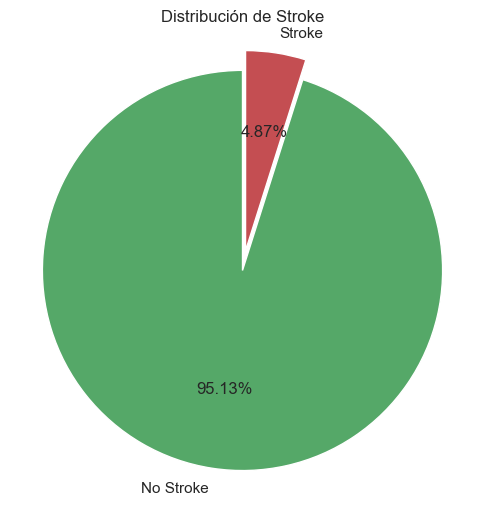

In [1019]:
# stroke - pie chart
stroke_counts = df_healthcare['stroke'].value_counts()
labels = ['No Stroke', 'Stroke']
colors = ['g', 'r']
explode = (0, 0.1)
plt.figure(figsize=(6, 6))
plt.pie(stroke_counts, labels=labels, colors=colors,
        startangle=90, explode=explode, autopct='%1.2f%%')
plt.axis('equal')
plt.title('Distribución de Stroke')
plt.show()


#### Variables numéricas Continuas - age, avg_glucose_level, bmi

**Histograma**

Un histograma muestra datos numéricos agrupándolos en "intervalos" de igual anchura. Cada intervalo se representa como una barra cuya altura corresponde al número de puntos de datos que contiene.

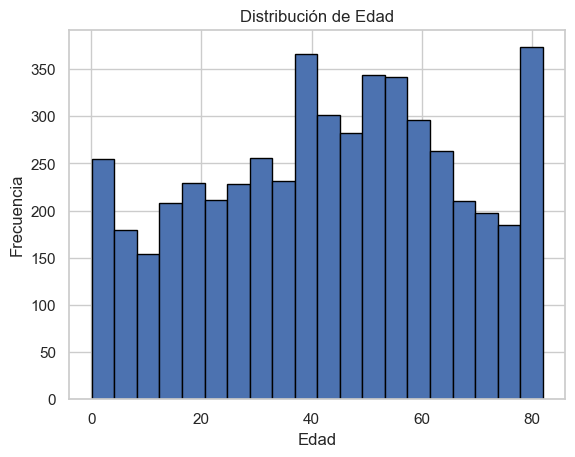

In [1020]:
# Gráfico simple - age
plt.hist(df_healthcare['age'], bins=20, edgecolor='black')
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

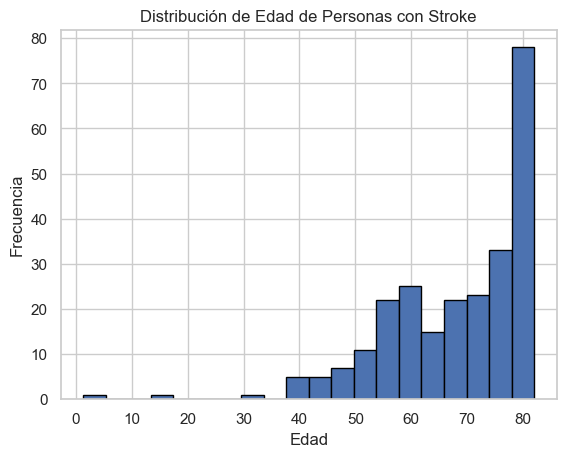

In [1021]:
# Histograma de "age" en gente con "stroke"
df_people_with_stroke = df_healthcare[df_healthcare['stroke'] == 1]
plt.hist(df_people_with_stroke['age'], bins=20, edgecolor='black')
plt.title('Distribución de Edad de Personas con Stroke')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

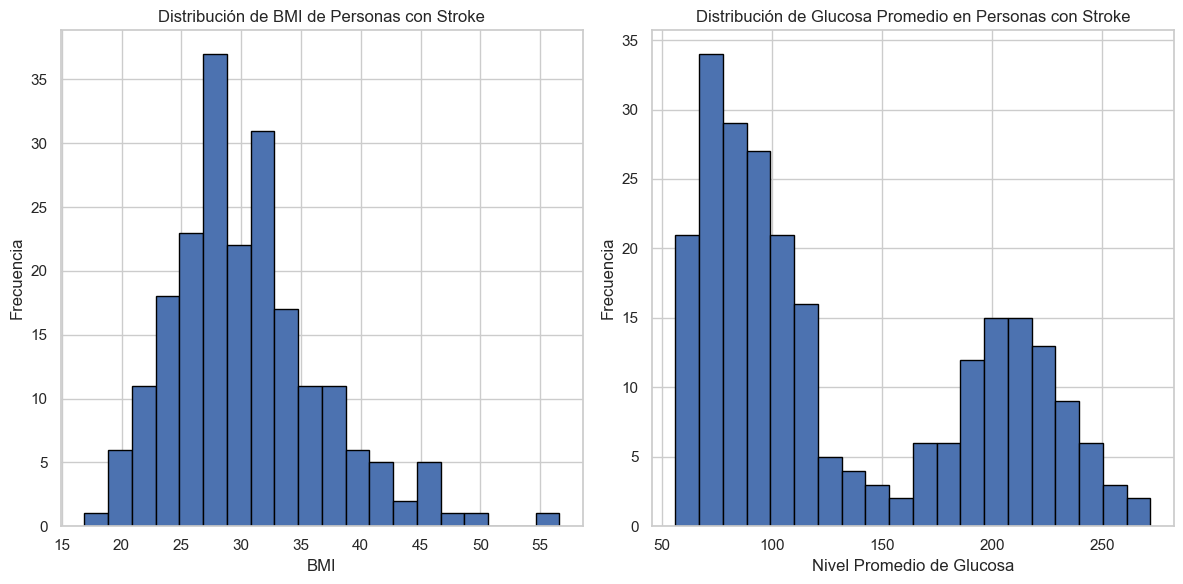

In [1022]:
# subplots - bmi, avg_glucose_level
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].hist(df_people_with_stroke['bmi'], bins=20, edgecolor='black')
axs[0].set_title('Distribución de BMI de Personas con Stroke')
axs[0].set_xlabel('BMI')
axs[0].set_ylabel('Frecuencia')

axs[1].hist(df_people_with_stroke['avg_glucose_level'], bins=20, edgecolor='black')
axs[1].set_title('Distribución de Glucosa Promedio en Personas con Stroke')
axs[1].set_xlabel('Nivel Promedio de Glucosa')
axs[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


#### Boxplots and Outliers

Un diagrama de caja es una forma estandarizada de mostrar la distribución de los datos basada en un resumen de cinco números ("mínimo", primer cuartil (Q1), mediana, tercer cuartil (Q3) y "máximo"). Puede informarle sobre sus valores atípicos y cuáles son. También puede indicarle si sus datos son simétricos, con qué precisión están agrupados y si están sesgados y de qué forma.

Represente en Diagramas de Cajas / Boxplot las variables númericas del punto anterior e interprete los resultados

#### ¿Debemos eliminar o mantener los valores atípicos?

In [1023]:
def plot_outliers(df):
    num_cols = df.select_dtypes(include=['float64', 'int64']).shape[1]
    num_rows = (num_cols - 1) // 2 + 1
    fig, axs = plt.subplots(num_rows, 2, figsize=(20, 5*num_rows))
    axs = axs.flatten()
    for i, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
        data = df[col].dropna()
        box = axs[i].boxplot(data, patch_artist=True, boxprops=dict(facecolor='#336fa2'), medianprops=dict(color='black'))
        for patch in box['fliers']:
            patch.set_markerfacecolor('black')
            patch.set_markeredgecolor('black')
        axs[i].set_title(col)
    plt.tight_layout()
    plt.show()


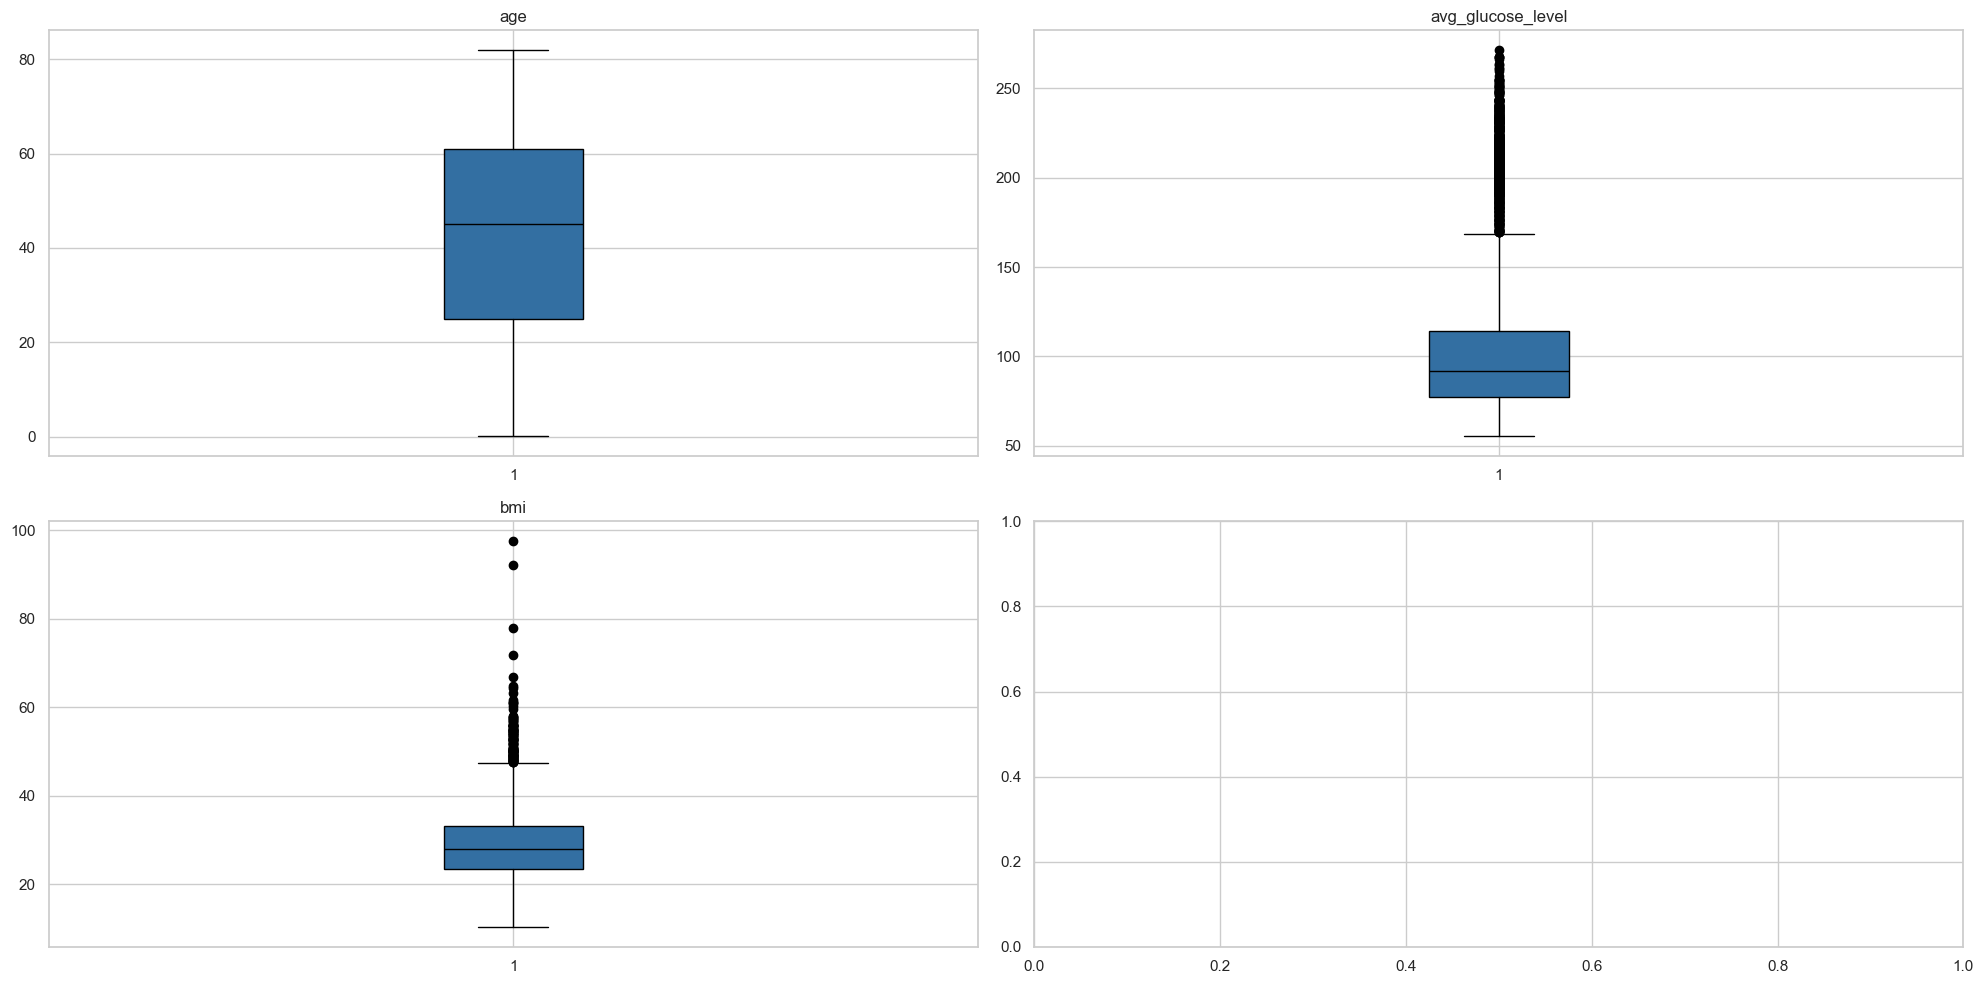

In [1024]:
plot_outliers(df_healthcare[["age", "avg_glucose_level", "bmi"]])

##### Debemos mantener los valores outliers porque CASI TODOS los valores atípicos dentro de df_healthcare son las personas que tienen stroke (como podemos ver en el gráfico de abajo).

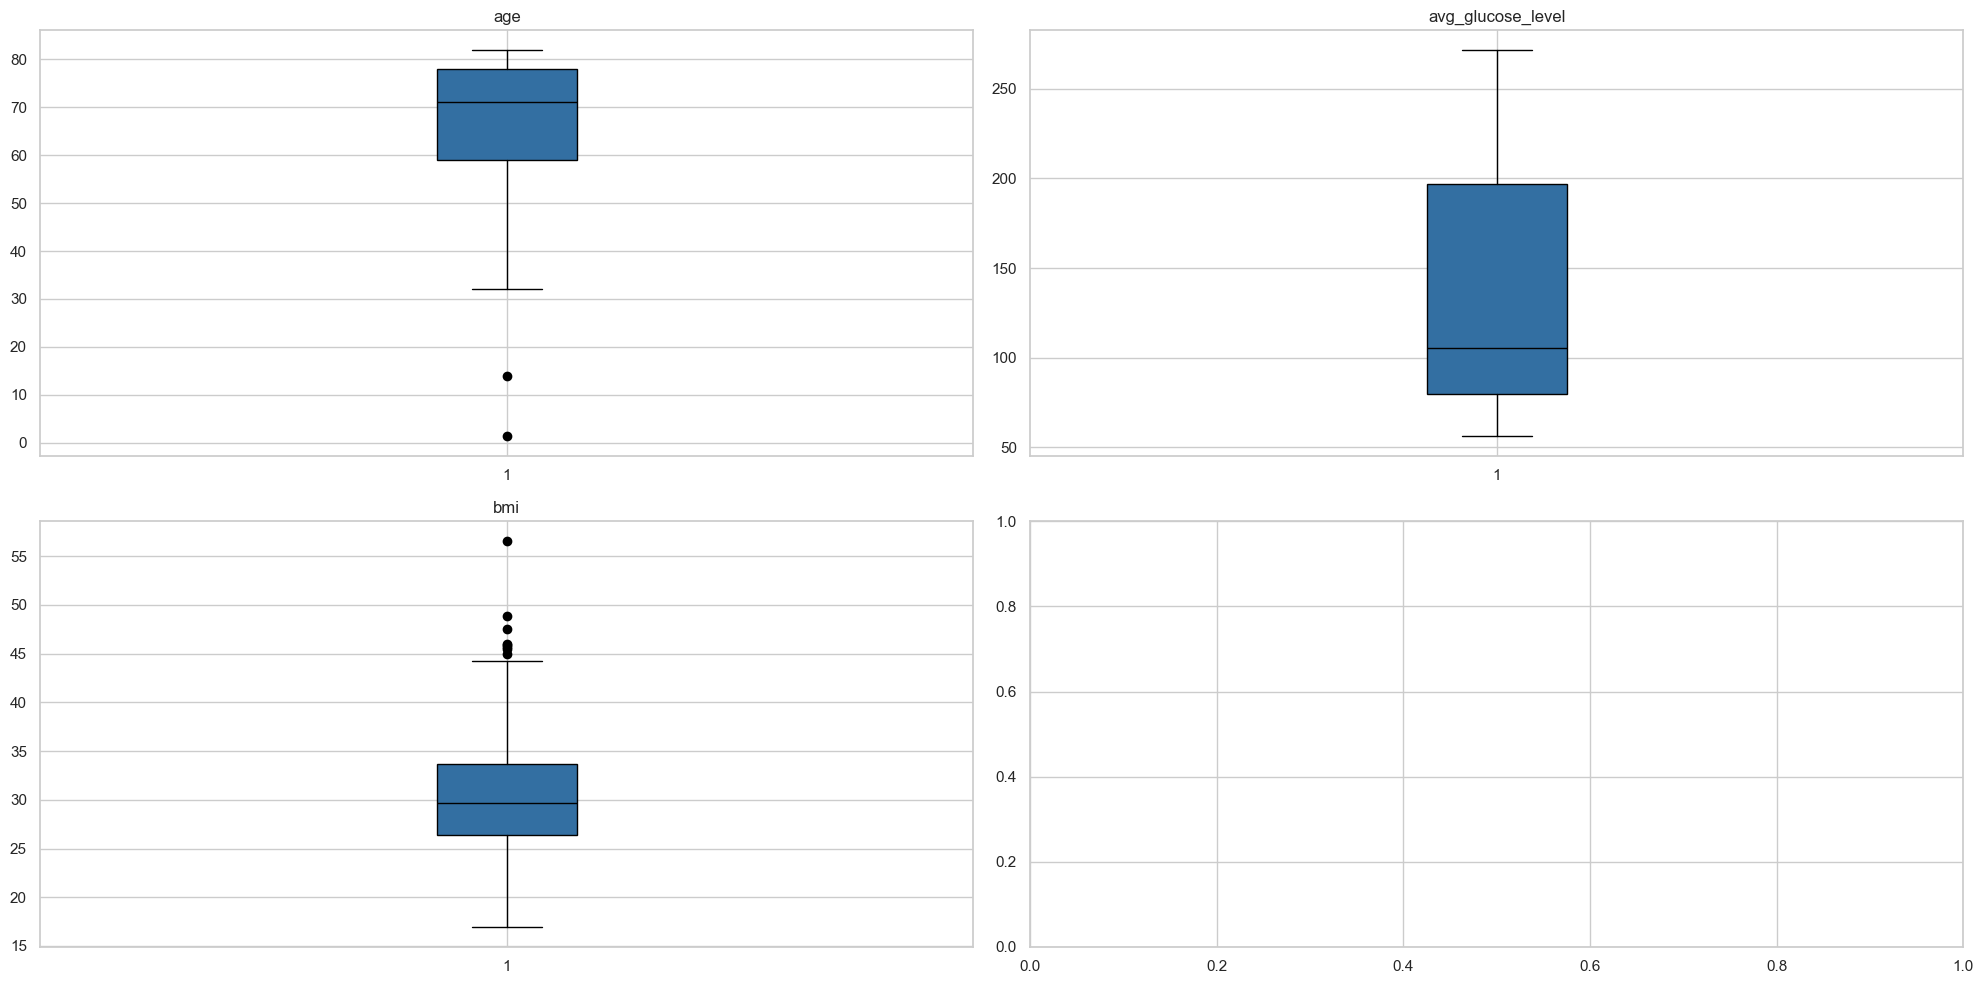

In [1025]:
plot_outliers(df_people_with_stroke[["age", "avg_glucose_level", "bmi"]])

#### Variables Categoricas - gender, ever_married, work_type, residence_type, smoking_status

In [1026]:
# Utilice la funcion describe para analizar las columnas no numericas
df_healthcare_objetos.describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


#### Diagrama de Barras

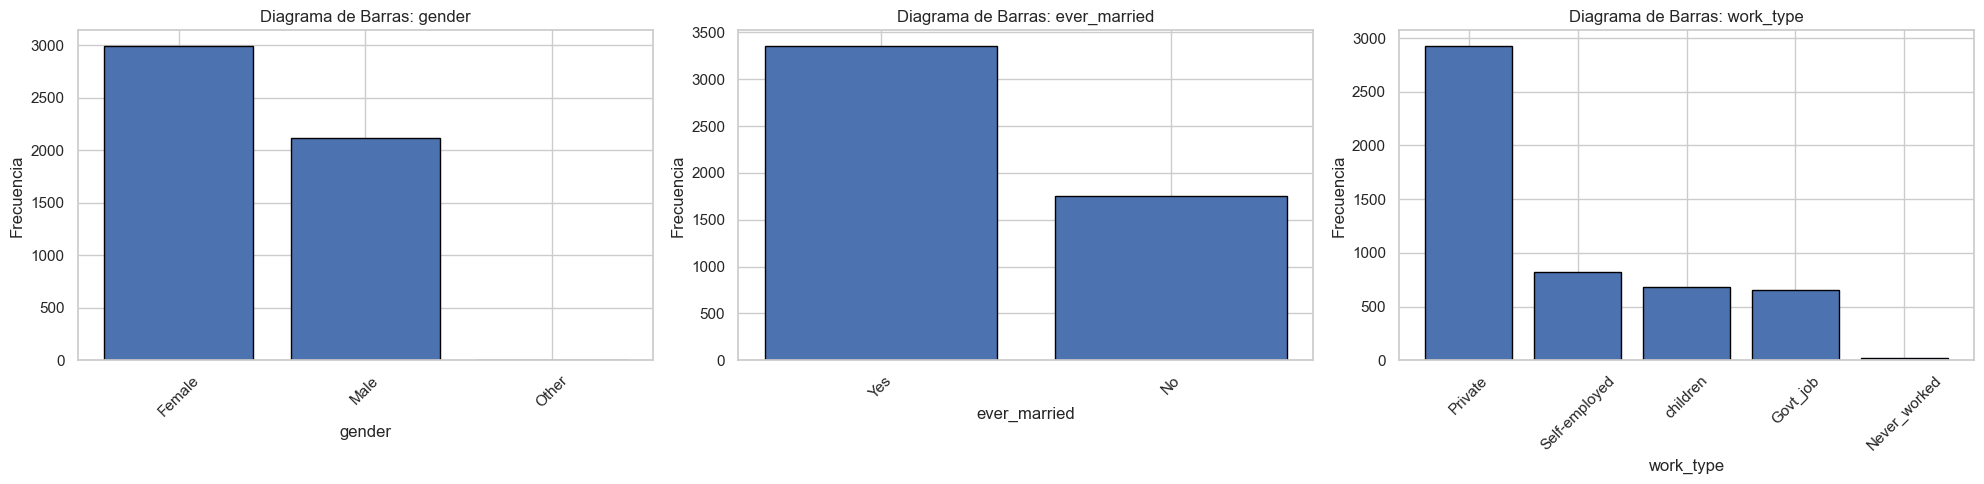

In [1027]:
# Diagrama de Barras para gender, ever_married y work_type
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

for ax, col in zip(axs, ['gender', 'ever_married', 'work_type']):
    counts = df_healthcare[col].value_counts()
    
    ax.bar(counts.index, counts.values, edgecolor='black')
    ax.set_title(f'Diagrama de Barras: {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

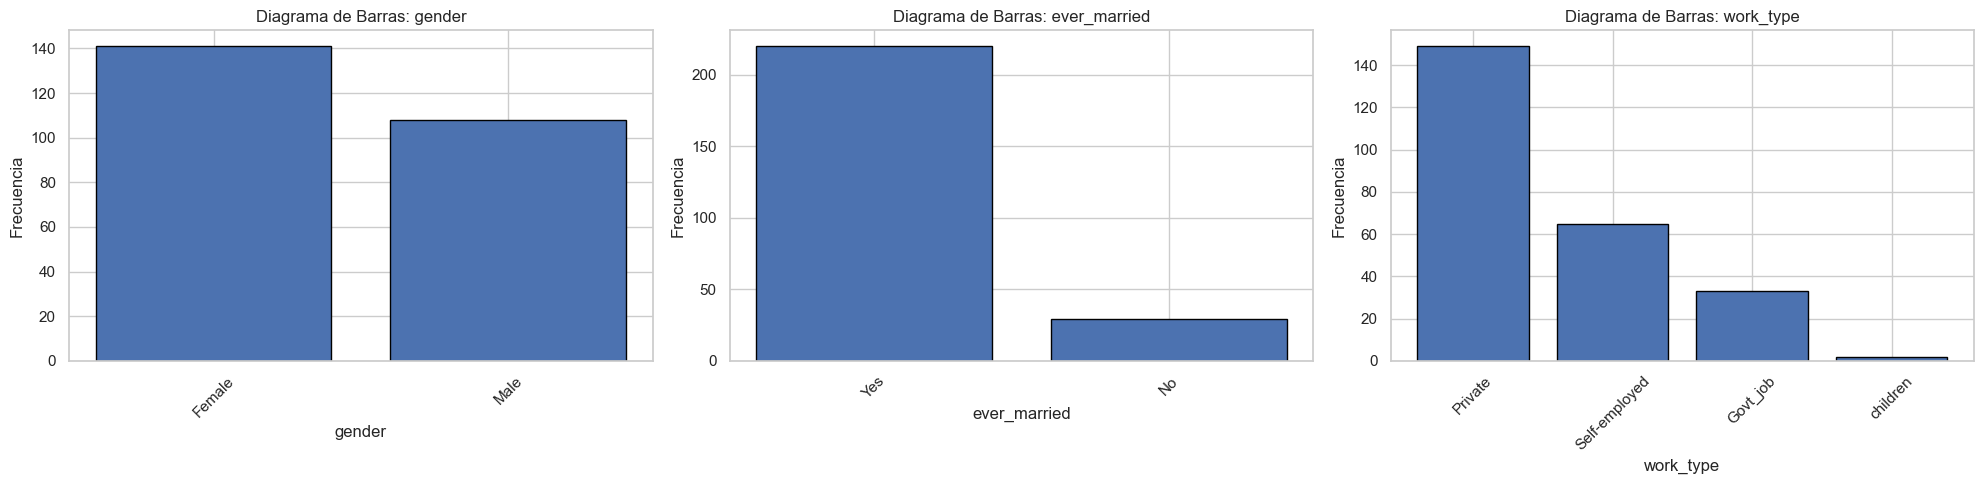

In [1028]:
# Lo mismo que arriba para las personas que han sufrido la enfermedad
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

for ax, col in zip(axs, ['gender', 'ever_married', 'work_type']):
    counts = df_people_with_stroke[col].value_counts()
    
    ax.bar(counts.index, counts.values, edgecolor='black')
    ax.set_title(f'Diagrama de Barras: {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [1029]:
df_healthcare

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


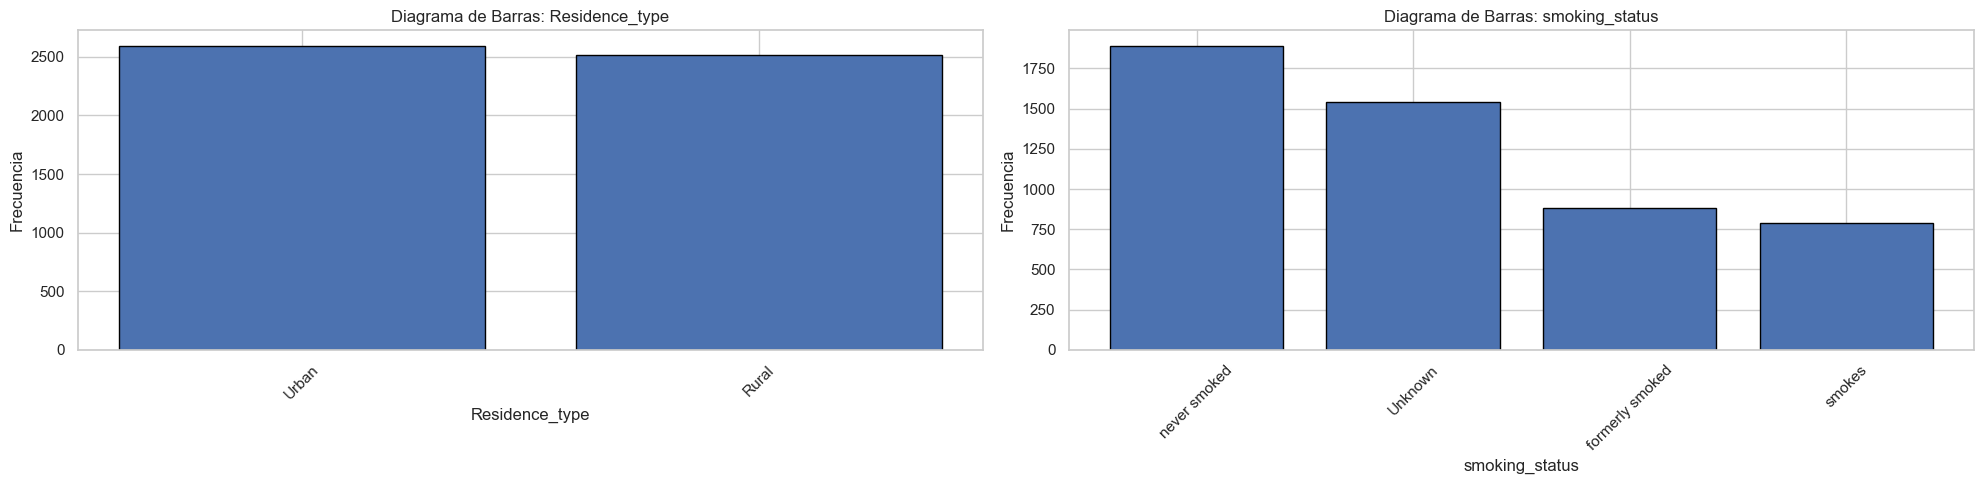

In [1030]:
#  Diagrama de Barras para residence_type y smoking_status
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

for ax, col in zip(axs, ['Residence_type', 'smoking_status']):
    counts = df_healthcare[col].value_counts()
    
    ax.bar(counts.index, counts.values, edgecolor='black')
    ax.set_title(f'Diagrama de Barras: {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


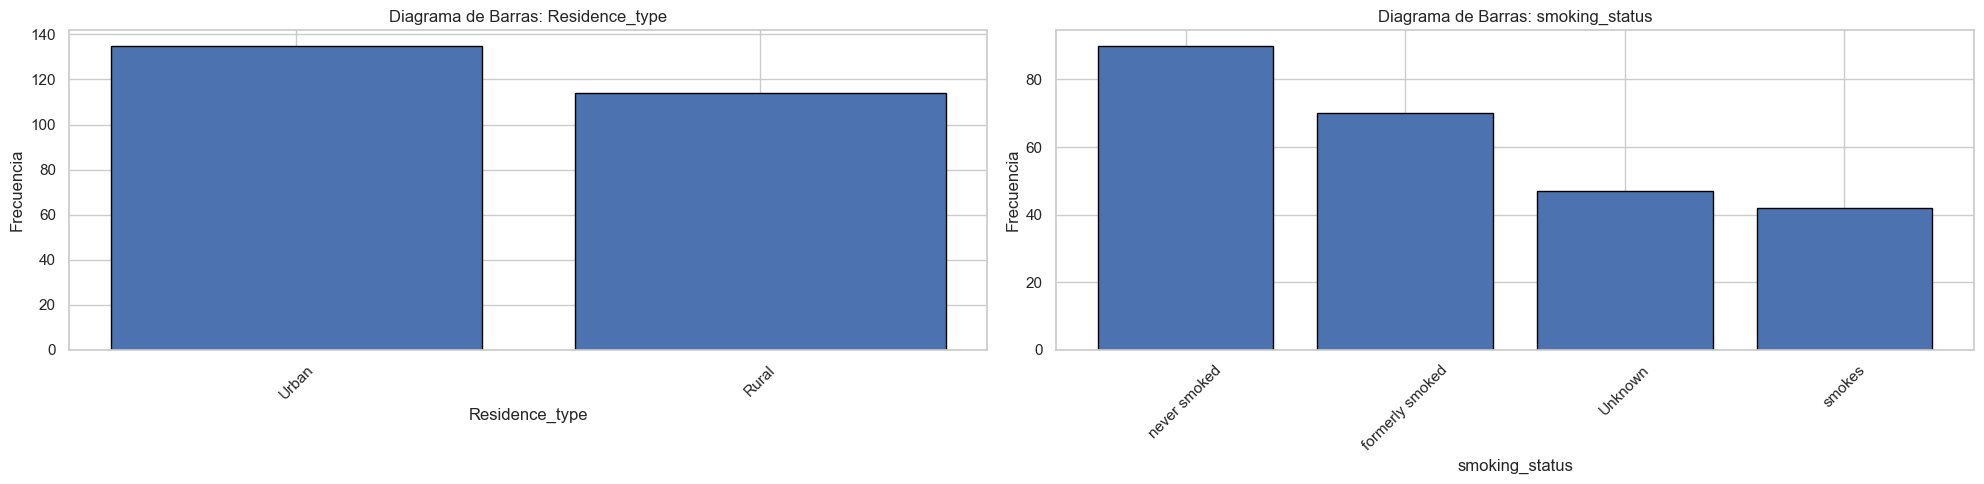

In [1031]:
# Lo mismo que arriba pero para personas que sufrieron la enfermedad
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

for ax, col in zip(axs, ['Residence_type', 'smoking_status']):
    counts = df_people_with_stroke[col].value_counts()
    
    ax.bar(counts.index, counts.values, edgecolor='black')
    ax.set_title(f'Diagrama de Barras: {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## Analisis Bivariado

#### ¿Las personas mayores tienden a tener más accidentes cerebrovasculares? (Ayudese con un Diagrama de Cajas comparativo)

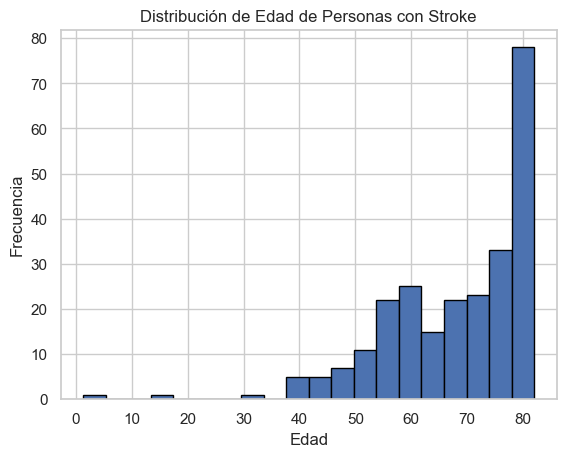

In [1032]:
plt.hist(df_people_with_stroke['age'], bins=20, edgecolor='black')
plt.title('Distribución de Edad de Personas con Stroke')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

##### Sí. Las personas mayores tienden a tener más accidentes cerebrovasculares.

<Figure size 800x600 with 0 Axes>

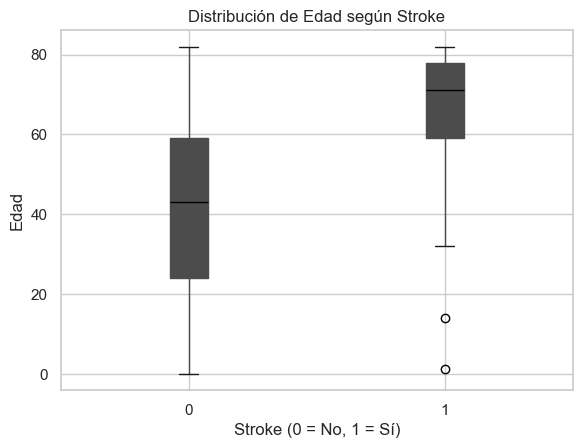

In [1033]:
plt.figure(figsize=(8, 6))
df_healthcare.boxplot(column='age', by='stroke', patch_artist=True,
                      medianprops=dict(color='black'))
plt.title("Distribución de Edad según Stroke")
plt.suptitle('') 
plt.xlabel("Stroke (0 = No, 1 = Sí)")
plt.ylabel("Edad")
plt.show()


#### Existe una conexión entre el tipo de trabajo que realiza y su índice de masa corporal? (Utilice violinplot)

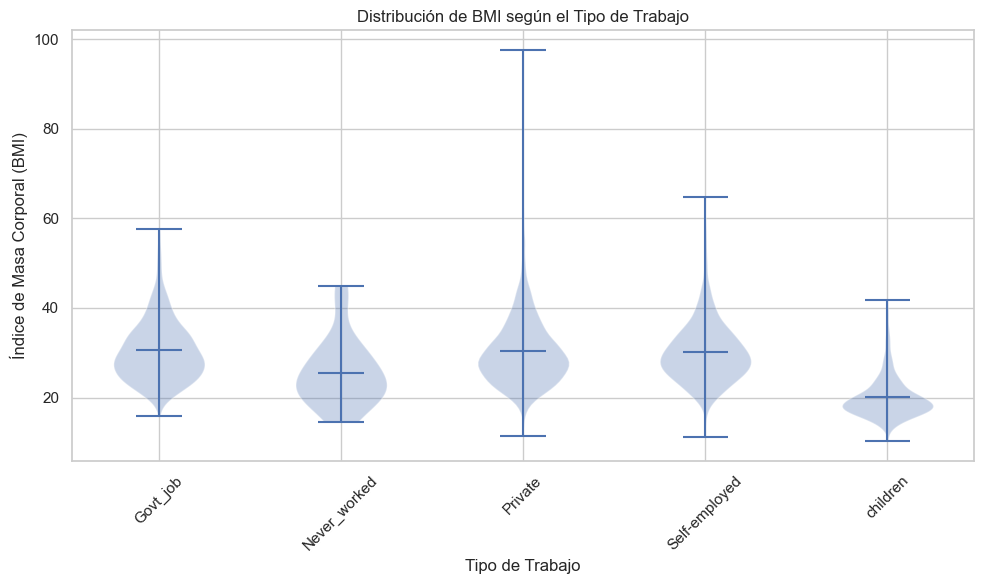

In [1034]:
groups = df_healthcare.groupby('work_type')['bmi'].apply(lambda x: x.dropna().tolist())
data = groups.tolist()
categories = groups.index.tolist()

plt.figure(figsize=(10, 6))
vp = plt.violinplot(data, showmeans=True)

plt.xticks(range(1, len(categories)+1), categories, rotation=45)
plt.xlabel("Tipo de Trabajo")
plt.ylabel("Índice de Masa Corporal (BMI)")
plt.title("Distribución de BMI según el Tipo de Trabajo")
plt.tight_layout()
plt.show()

Al observar el violinplot que compara el **BMI** en función del **tipo de trabajo**, se pueden destacar los siguientes puntos:

1. **Posición de la Mediana y Rango Intercuartílico (IQR)**  
   - Las medianas (líneas gruesas o puntos en el centro de cada “violín”) para la mayoría de los tipos de trabajo se encuentran en un rango bastante parecido (aproximadamente entre 25 y 30).  
   - Esto sugiere que, en promedio, no hay diferencias muy marcadas en el índice de masa corporal según el tipo de trabajo.

2. **Dispersión de la Distribución**  
   - Algunas categorías (por ejemplo, *Private* y *Self-employed*) muestran un “violín” más ancho y alargado, indicando mayor variabilidad en los valores de BMI.  
   - Otras categorías, como *Never_worked* o *children*, tienen una distribución más estrecha o menos datos, lo que se refleja en violines más pequeños.

3. **Superposición entre Categorías**  
   - Los “violines” se superponen bastante en el rango de valores, lo cual sugiere que las diferencias entre los grupos no son lo suficientemente grandes como para afirmar una conexión fuerte entre el tipo de trabajo y el BMI.

### Conclusión

- **A simple vista, no se observa una relación contundente** entre el tipo de trabajo y el índice de masa corporal, puesto que las medianas son similares y las distribuciones se superponen en buena medida.  

#### ¿Las personas mayores tienen un nivel de glucosa promedio más alto? (Ayudese utilizando un scatterplot)

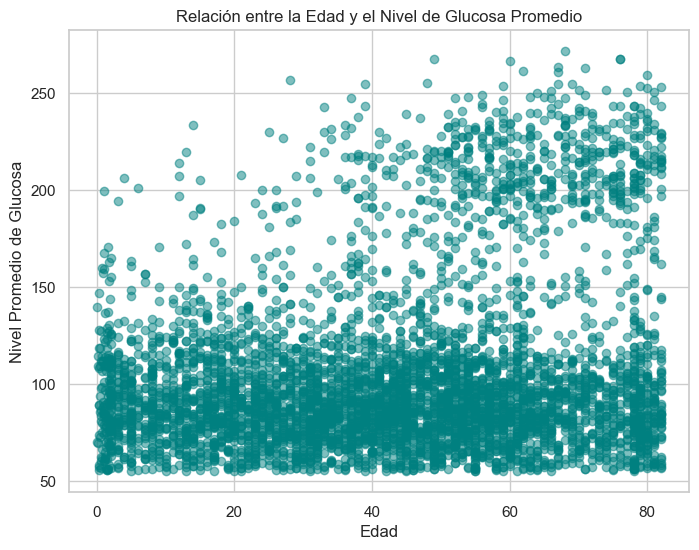

In [1035]:
plt.figure(figsize=(8,6))
plt.scatter(df_healthcare['age'], df_healthcare['avg_glucose_level'], alpha=0.5, color='teal')
plt.xlabel('Edad')
plt.ylabel('Nivel Promedio de Glucosa')
plt.title('Relación entre la Edad y el Nivel de Glucosa Promedio')
plt.show()

##### Las personas mayores CLARAMENTE tienen un nivel de glucosa promedio más alto

#### Tabaquismo frente a accidente cerebrovascular y tipo de trabajo frente a hipertensión (realice la comparacion utilizando countplot)

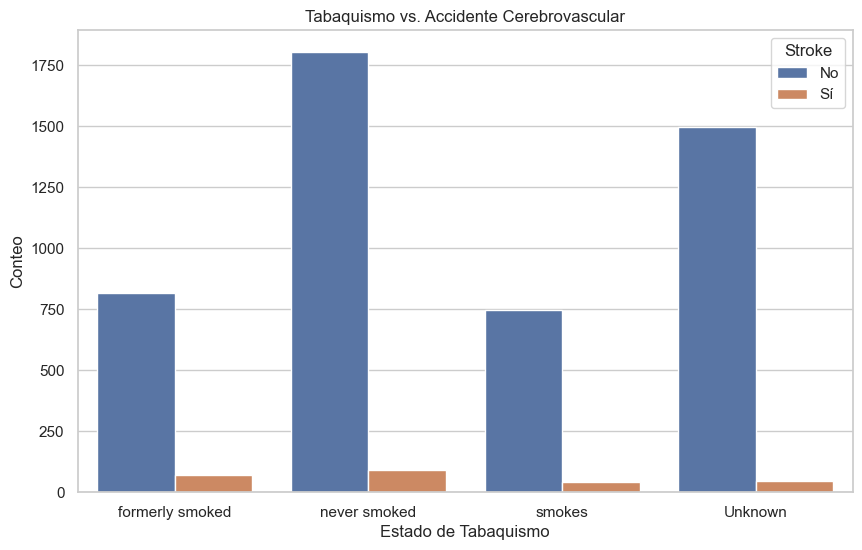

In [1036]:
#1. Tabaquismo vs. Accidente Cerebrovascular

plt.figure(figsize=(10, 6))
sns.countplot(data=df_healthcare, x='smoking_status', hue='stroke')
plt.title('Tabaquismo vs. Accidente Cerebrovascular')
plt.xlabel('Estado de Tabaquismo')
plt.ylabel('Conteo')
plt.legend(title='Stroke', labels=['No', 'Sí'])
plt.show()

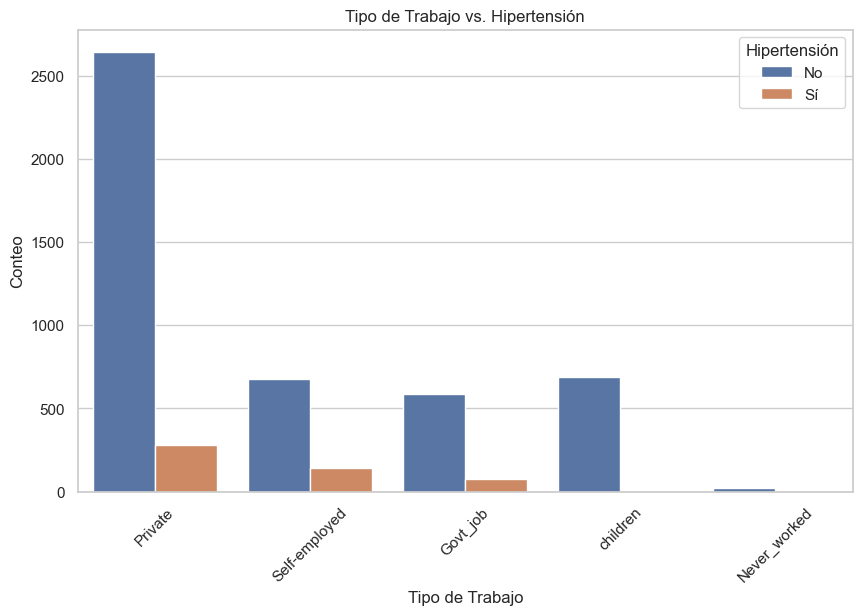

In [1037]:
#2. Tipo de Trabajo vs. Hipertensión

plt.figure(figsize=(10, 6))
sns.countplot(data=df_healthcare, x='work_type', hue='hypertension')
plt.title('Tipo de Trabajo vs. Hipertensión')
plt.xlabel('Tipo de Trabajo')
plt.ylabel('Conteo')
plt.legend(title='Hipertensión', labels=['No', 'Sí'])
plt.xticks(rotation=45)
plt.show()

## Ejercicio

   
Crea una figura de 3 subplots para responder las siguientes preguntas:
   
   a) ¿Cuál es el porcentaje de personas con hipertensión en el conjunto de datos?
   
   b) En los diferentes valores dentro de la característica ""smoking_status"", ¿los hombres superan en número a las mujeres en alguno de ellos?
   
   c) ¿Qué me puede decir sobre la relación entre el tipo de trabajo y la edad?
   
   Todas las figuras deben contener títulos.

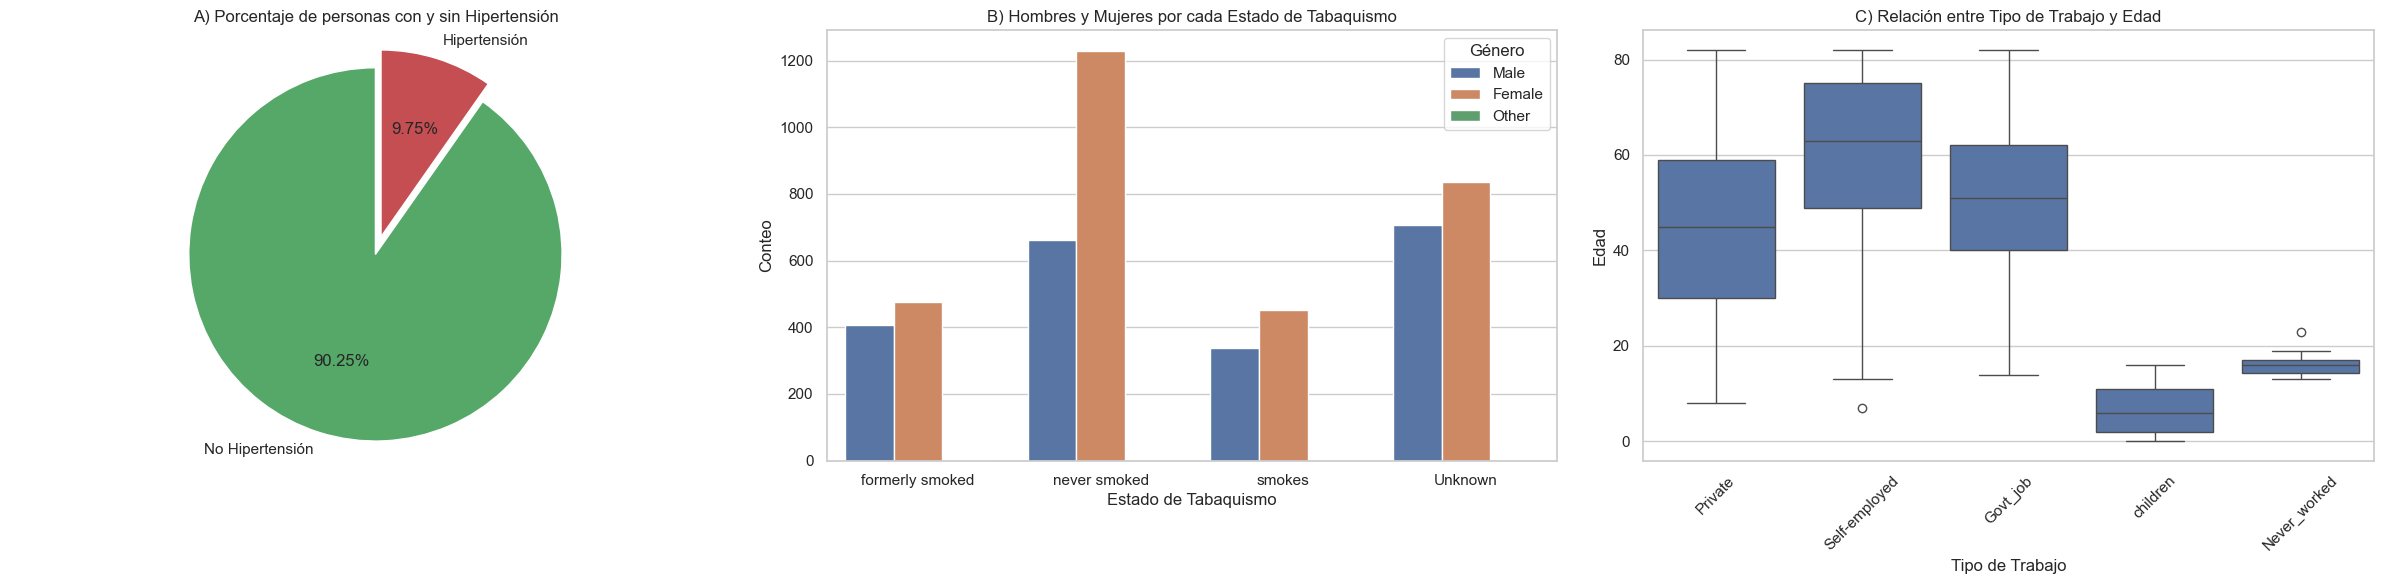

In [1038]:
fig, axs = plt.subplots(1, 3, figsize=(24, 6))

# A) Pie chart: Porcentaje de personas con y sin Hipertensión
hypertension_counts = df_healthcare['hypertension'].value_counts()
labels = ['No Hipertensión', 'Hipertensión']
colors = ['g', 'r']
explode = (0, 0.1)
axs[0].pie(hypertension_counts, labels=labels, colors=colors,
           startangle=90, explode=explode, autopct='%1.2f%%')
axs[0].axis('equal')
axs[0].set_title('A) Porcentaje de personas con y sin Hipertensión')

# B) Countplot: Hombres y Mujeres por cada Estado de Tabaquismo
sns.countplot(data=df_healthcare, x='smoking_status', hue='gender', ax=axs[1])
axs[1].set_title('B) Hombres y Mujeres por cada Estado de Tabaquismo')
axs[1].set_xlabel('Estado de Tabaquismo')
axs[1].set_ylabel('Conteo')
axs[1].legend(title='Género')

# C) Boxplot: Relación entre Tipo de Trabajo y Edad
sns.boxplot(data=df_healthcare, x='work_type', y='age', ax=axs[2])
axs[2].set_title('C) Relación entre Tipo de Trabajo y Edad')
axs[2].set_xlabel('Tipo de Trabajo')
axs[2].set_ylabel('Edad')
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## Missing Data

Analice las variabels con valores nulos y calcule los porcentajes de dichos valores por variable

In [1039]:
def validate_columns(df):
    summary_df = df.describe(include='all').T
    summary_df['Num_Null_Values'] = df.isnull().sum()
    summary_df['%_Null_Values'] = (summary_df['Num_Null_Values'] / len(df)) * 100
    summary_df = summary_df[['Num_Null_Values', '%_Null_Values',]]
    return summary_df

In [1040]:
validate_columns(df_healthcare)

,Num_Null_Values,%_Null_Values
id,0,0.000000
gender,0,0.000000
age,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000
bmi,201,3.933464


Imprima los registros del data set con valores faltantes

In [1041]:
df_healthcare[df_healthcare.isnull().any(axis=1)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


Crear un flag para indicar los valores faltantes para las variables con valores nulos

In [1042]:
df_healthcare['bmi_missing'] = df_healthcare['bmi'].isnull().astype(int)
df_healthcare['bmi_missing']

0       0
1       1
2       0
3       0
4       0
       ..
5105    1
5106    0
5107    0
5108    0
5109    0
Name: bmi_missing, Length: 5110, dtype: int64

Rellene los valores faltantes con la media

In [1043]:
df_healthcare['bmi'] = df_healthcare['bmi'].fillna(df_healthcare['bmi'].mean())
df_healthcare['bmi']

0       36.600000
1       28.893237
2       32.500000
3       34.400000
4       24.000000
          ...    
5105    28.893237
5106    40.000000
5107    30.600000
5108    25.600000
5109    26.200000
Name: bmi, Length: 5110, dtype: float64

In [1044]:
df_healthcare.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
bmi_missing          0
dtype: int64

## Análisis de Correlación


Analice la correlación entre las variables, presente un heatmap y extraiga conclusiones

In [1045]:
def crear_heatmap_correlacion(df):
    def seleccionar_columnas_numericas(df):
        return df.select_dtypes(include=['float64', 'int64'])
    df_numeric = seleccionar_columnas_numericas(df)
    df_numeric = df_numeric.drop(columns=[col for col in df_numeric.columns if col.startswith("Unnamed:") or col.strip() == ""])
    corr_matrix = df_numeric.corr()

    plt.figure(figsize=(10, 10))
    sns.heatmap(
        round(corr_matrix, 2),
        cmap='coolwarm',
        annot=True,
        annot_kws={"size": 10}
    )
    plt.show()

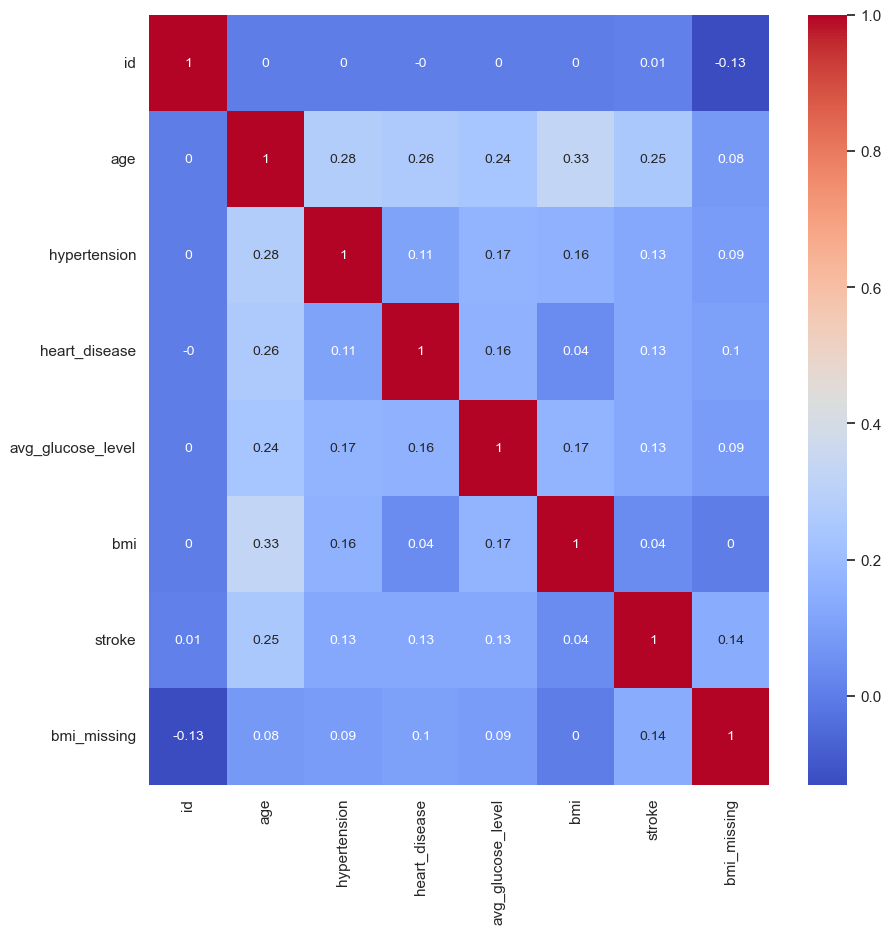

In [1046]:
crear_heatmap_correlacion(df_healthcare)

### Interpretación General de la Matriz de Correlación

1. **`id`**  
   - Por lo general, es un identificador único y no debería aportar información estadística relevante. En la mayoría de los casos, sus correlaciones con otras variables son cercanas a 0.

2. **`age`**  
   - Suele mostrar la **mayor correlación con `stroke`** (por ejemplo, alrededor de 0.25 en muchos datasets de este tipo), lo que sugiere que a mayor edad, aumenta ligeramente la probabilidad de presentar un accidente cerebrovascular.  
   - También puede tener correlaciones positivas moderadas con variables como `hypertension` o `heart_disease`, lo que indica que, a mayor edad, hay cierta tendencia a presentar estas condiciones.

3. **`hypertension` y `heart_disease`**  
   - Suelen presentar **correlaciones positivas bajas o moderadas** con `stroke` (alrededor de 0.10 a 0.15). Esto sugiere que, si bien existe cierta relación, no es muy fuerte.  
   - También pueden mostrar correlación positiva entre sí y con `age`.

4. **`avg_glucose_level`**  
   - A menudo presenta una correlación **positiva baja** con `stroke` (en el rango de 0.10 a 0.20). Esto indica que quienes tienen niveles de glucosa más altos pueden estar ligeramente más propensos a sufrir un accidente cerebrovascular, pero la fuerza de la relación no es muy elevada.

5. **`bmi`**  
   - Por lo general, muestra **correlaciones bajas** con la mayoría de variables, incluyendo `stroke`. Puede variar ligeramente dependiendo de si los datos incluyen valores atípicos o imputaciones.

6. **`bmi_missing` (si existiese en el dataset)**  
   - Es una variable indicadora (dummy) que marca si el valor de BMI está ausente. Su correlación con otras variables, incluyendo `stroke`, suele ser muy baja o poco significativa, a menos que la ausencia de datos en BMI esté relacionada con algún patrón en particular.

### Conclusiones Principales

- **No hay correlaciones extremadamente altas** entre las variables (todas parecen estar por debajo de 0.30). Esto indica que no existe una variable numérica que, por sí sola, explique de forma contundente la ocurrencia de `stroke`.
- **`age`** es la variable más correlacionada con `stroke`, aunque la correlación es moderada (alrededor de 0.25). Esto coincide con la expectativa de que a mayor edad hay un riesgo mayor de sufrir un accidente cerebrovascular.
- **`hypertension`, `heart_disease` y `avg_glucose_level`** muestran correlaciones bajas pero positivas con `stroke`. Pueden influir en la probabilidad de tener un accidente cerebrovascular, pero no de manera muy marcada en este conjunto de datos.
- **`bmi`** presenta una correlación muy baja con `stroke`, lo que sugiere que, en este dataset, el índice de masa corporal no está fuertemente relacionado con la presencia de un accidente cerebrovascular.
- Siempre es importante recordar que la correlación no implica causalidad.
